Importing the Dependencies

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

Data Collection & Pre-Processing

In [102]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('data/mail_data.csv')

In [103]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [104]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [105]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Label Encoding

In [107]:
# label spam mail as 0;  ham mail as 1;

mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})

/tmp/ipykernel_33482/3075571570.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})


spam  -  0

ham  -  1

Remove null values

In [108]:
mail_data.dropna(subset=['Category'], inplace=True)
mail_data['Category'] = mail_data['Category'].astype('int')

/tmp/ipykernel_33482/1209652828.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mail_data['Category'] = mail_data['Category'].astype('int')


EDA

Category
1    4825
0     747
Name: count, dtype: int64
Proportion: 
Category
1    0.865937
0    0.134063
Name: proportion, dtype: float64


/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/_base.py:1447: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[axis] = cat_data
/tmp/ipykernel_33482/3629027261.py:7: FutureWarning: 

Passing `palette` without assigni

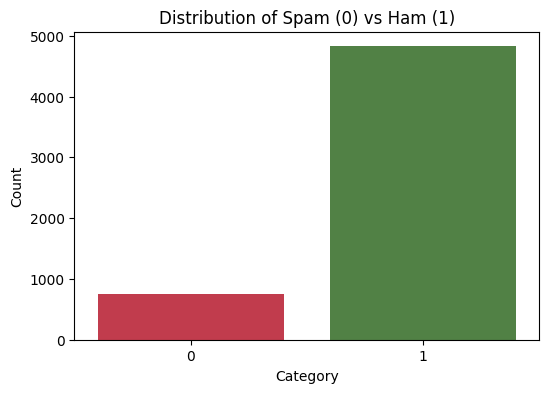

In [109]:
print(mail_data['Category'].value_counts())
print('Proportion: ')
print(mail_data['Category'].value_counts(normalize=True))

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=mail_data, palette=['#D7263D', '#4B8B3B'])
plt.title('Distribution of Spam (0) vs Ham (1)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [110]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [111]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [112]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


Splitting the data into training data & test data

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3, stratify=Y)

In [114]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [115]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('model', LogisticRegression(solver='liblinear', random_state=42))
])

param_grid = {
    'tfidf__min_df': [1, 5],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'model__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')

Training the Model

In [116]:
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score found
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Get the best model found by the grid search
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END model__C=0.1, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END model__C=0.1, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END model__C=0.1, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END model__C=0.1, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END model__C=0.1, tfidf__min_df=1, tfidf__ngram_range=(1, 2); total time=   0.1s
[CV] END model__C=0.1, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END model__C=0.1, tfidf__min_df=1, tfidf__ngram_range=(1, 2); total time=   0.2s
[CV] END model__C=0.1, tfidf__min_df=1, tfidf__ngram_range=(1, 2); total time=   0.2s
[CV] END model__C=0.1, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END model__C=0.1, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time=   0.1s
[CV] END model__C=0.1, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 

Evaluate best model on test data

In [117]:
Y_pred = best_model.predict(X_test)

print(f'Test data accuracy: {accuracy_score(Y_test, Y_pred):.4f}')

print(f'Classofication Report: {classification_report(Y_test, Y_pred, target_names=['Spam (0)', 'Ham (1)'])}')

Test data accuracy: 0.9848
Classofication Report:               precision    recall  f1-score   support

    Spam (0)       0.99      0.90      0.94       149
     Ham (1)       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



Plot Confusion Matrix

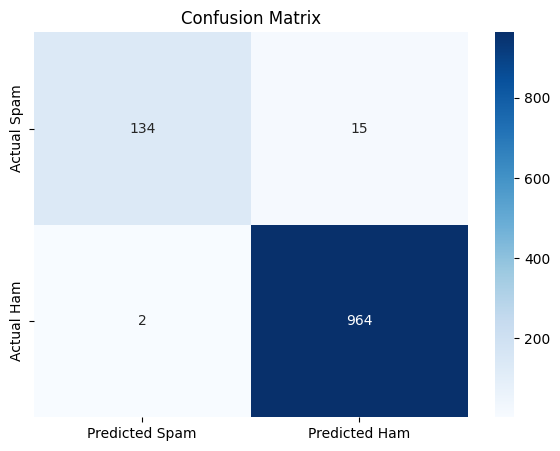

In [118]:
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Spam', 'Predicted Ham'], yticklabels=['Actual Spam', 'Actual Ham'])

plt.title('Confusion Matrix')
plt.show()

Building a Predictive System

In [119]:
input_mail_ham = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_mail_spam = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

prediction_ham = best_model.predict(input_mail_ham)
probability_ham = best_model.predict_proba(input_mail_ham)

if (prediction_ham[0] == 1):
    print(f"Prediction (Ham Example): 'Ham mail' (Confidence: {probability_ham[0][1]:.2%})")
else:
    print(f"Prediction (Ham Example): 'Spam mail' (Confidence: {probability_ham[0][0]:.2%})")


# --- Spam Prediction ---
prediction_spam = best_model.predict(input_mail_spam)
probability_spam = best_model.predict_proba(input_mail_spam)

if (prediction_spam[0] == 1):
    print(f"Prediction (Spam Example): 'Ham mail' (Confidence: {probability_spam[0][1]:.2%})")
else:
    print(f"Prediction (Spam Example): 'Spam mail' (Confidence: {probability_spam[0][0]:.2%})")

Prediction (Ham Example): 'Ham mail' (Confidence: 98.91%)
Prediction (Spam Example): 'Spam mail' (Confidence: 89.05%)
